Show how channels correspond to frequency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mkids import TopSoc

In [2]:
soc = TopSoc()

  mkids.py AxisChSelPfbV2.ch2tran:  ch, ntran, addr, bit [0] [0] [0] [0]


[2248 2249 2250 2251 2252 2253 2254]


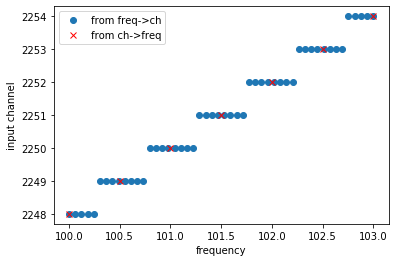

In [3]:
f0 = 100
f1 = 103
inFreqs = np.linspace(f0, f1)
inChs = soc.inFreq2ch(inFreqs)
plt.plot(inFreqs, inChs, "o", label="from freq->ch")
inChs2 = np.arange(inChs.min(),inChs.max()+1)
print(inChs2)
inFreqs2 = soc.inCh2FreqCenter(inChs2)
plt.plot(inFreqs2, inChs2, "rx", label="from ch->freq")
plt.xlabel("frequency")
plt.ylabel("input channel")
plt.legend()

In [4]:
ch = np.array(2249.0)
print("ch =",ch)
fc = soc.pfb_in.fc
print("fc =",fc)
fs = soc.pfb_in.fs
print("fs =",fs)
freq = ch*fc - fs/2
print("freq =",freq)
print("soc.pfb_in.ch2freq(ch) =",soc.pfb_in.ch2freq(ch))
print("soc.inCh2FreqCenter(ch) =",soc.inCh2FreqCenter(ch))

ch = 2249.0
fc = 0.5
fs = 2048.0
freq = 100.5
soc.pfb_in.ch2freq(ch) = 100.5
soc.inCh2FreqCenter(ch) = 100.5


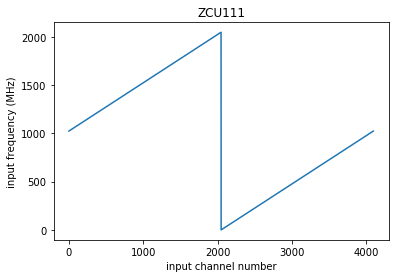

In [5]:
allInChs = np.arange(soc.nInCh)
allInFreqs = soc.inCh2FreqCenter(allInChs)
testAllInChs, testOffsets = soc.inFreq2chOffset(allInFreqs)
plt.plot(allInChs, allInFreqs)
plt.xlabel("input channel number")
plt.ylabel("input frequency (MHz)")
_ = plt.title(soc.board)

In [6]:
# Should be True, since we converted from channel to frequncy and back to channel 
np.array_equal(allInChs, testAllInChs)

True

In [8]:
# Should be True, since the freqencies calculate from channel number are at the center of the channel
np.allclose(testOffsets, np.zeros(soc.nInCh))

True

In [9]:
# Set the mixer to the center of the input band
fMixer = soc.fsIn/2
soc.set_mixer(fMixer)


2048.0

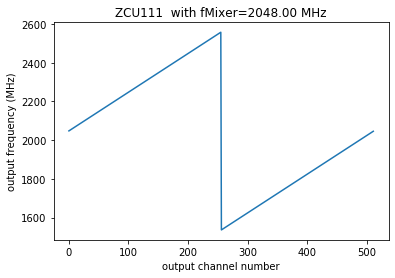

In [10]:
allOutChs = np.arange(soc.nOutCh)
allOutFreqs = soc.outCh2FreqCenter(allOutChs)
testAllOutChs, testOffsets = soc.outFreq2chOffset(allOutFreqs)
plt.plot(allOutChs, allOutFreqs)
plt.xlabel("output channel number")
plt.ylabel("output frequency (MHz)")
_ = plt.title("%s  with fMixer=%.2f MHz"%(soc.board, soc.get_mixer()))

In [11]:
# Should be True, since we converted from channel to frequency and back to channel 
np.array_equal(allOutChs, testAllOutChs)

True

In [12]:
# Should be True, since the frequencies calculate from channel number are at the center of the channel
np.allclose(testOffsets, np.zeros(soc.nOutCh))

True

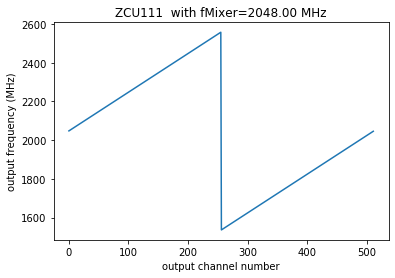

In [13]:

allOutChsa = np.arange(soc.nOutCh)
allOutFreqsa = soc.outCh2FreqCenter(allOutChsa)
testAllOutChsa = soc.outFreq2ch(allOutFreqsa)
plt.plot(allOutChsa, allOutFreqsa)
plt.xlabel("output channel number")
plt.ylabel("output frequency (MHz)")
_ = plt.title("%s  with fMixer=%.2f MHz"%(soc.board, soc.get_mixer()))

In [14]:
# Should be True, since we converted from channel to frequency and back to channel 
np.array_equal(allOutChsa, testAllOutChsa)

True

In [15]:
fMixer = soc.fsIn/2/2
soc.set_mixer(fMixer)

toneFreq = 1026.0999755859375
print("inCh, dds_freq, pfb_freq, ch = ",soc.pfb_in.freq2ch(toneFreq))
print("inCh, offset = ",soc.inFreq2chOffset(toneFreq))

inCh, dds_freq, pfb_freq, ch =  (4, 0.0999755859375, 1026.0, 2052.0)
inCh, offset =  (4, 0.0999755859375)
